In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
img = cv2.imread("caneca1.jpeg") 

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [38]:
color_window = 50
texture_window = 10

In [39]:
objects = np.zeros_like(gray)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        # Define as janelas de cor e textura
        color_min = max(0, i - color_window)
        color_max = min(gray.shape[0], i + color_window)
        texture_min = max(0, j - texture_window)
        texture_max = min(gray.shape[1], j + texture_window)

        # Calcula a média e variância da cor e textura nas janelas definidas
        color_mean = np.mean(gray[color_min:color_max, texture_min:texture_max])
        color_var = np.var(gray[color_min:color_max, texture_min:texture_max])
        texture_mean = np.mean(gray[color_min:color_max, texture_min:texture_max])
        texture_var = np.var(gray[color_min:color_max, texture_min:texture_max])

        # Verifica se o pixel pertence a um objeto
        if (abs(gray[i,j] - color_mean) < color_window) and (abs(np.var(gray[color_min:color_max, texture_min:texture_max]) - texture_var) < texture_window):
            objects[i,j] = 255

Text(0.5, 1.0, 'Imagem original')

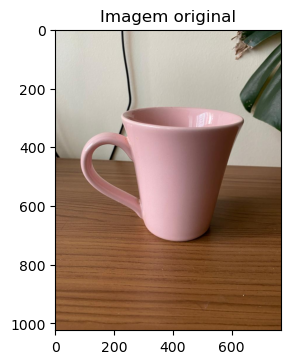

In [40]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagem original")

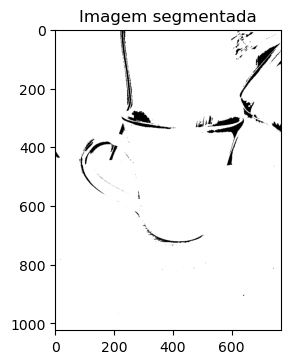

In [41]:
plt.subplot(1,2,2)
plt.imshow(objects, cmap="gray")
plt.title("Imagem segmentada")

plt.show()